# Họ và tên: Đỗ Tiến Đạt
# MSSV: 23120119
# Lớp: 23CTT2

## Chạy lần lượt từng đoạn cell từ trên xuống dưới để tránh bị lỗi mã nguồn.

In [27]:
class Matrix:
  '''
    A simple class for basic matrix operations: addition, multiplication, and summation.

    Attributes:
      data (list[list[float]]): 2D list representing the matrix.
      row (int): Number of rows.
      col (int): Number of columns.
  '''
  def __init__(self, data: list[list[float]]):
    '''
      Initializes a Matrix object.

      Parameters:
        data (list[list[float]]): 2D list representing the matrix elements.
    '''
    self.data = data
    self.row = len(data)
    self.col = len(data[0]) if data else 0

  def add(self, other: 'Matrix') -> 'Matrix':
    '''
      Adds two matrices of the same dimensions.

      Parameters:
        other (Matrix): The matrix to add.

      Returns:
        Matrix: A new matrix which is the sum of self and other.

      Raises:
        ValueError: If dimensions do not match.
    '''
    if self.row != other.row or self.col != other.col:
      raise ValueError('Matrix dimensions must match for addition')
    return Matrix(
        [[self.data[i][j] + other.data[i][j] for j in range(self.col)]
         for i in range(self.row)])

  def mul(self, other: 'Matrix') -> 'Matrix':
    '''
      Multiplies two matrices if dimensions are compatible.

      Parameters:
        other (Matrix): The matrix to multiply with.

      Returns:
        Matrix: A new matrix which is the result of self × other.

      Raises:
        ValueError: If the number of columns in self does not match rows in other.
    '''
    if self.col != other.row:
      raise ValueError('Matrix dimensions must match for multiplication')
    return Matrix(
        [[sum(self.data[i][k]*other.data[k][j] for k in range(self.col))
          for j in range(other.col)] for i in range(self.row)])

  def transpose(self) -> 'Matrix':
    '''
      Returns the transpose of the matrix.

      Returns:
        Matrix: Transposed matrix.
    '''
    return Matrix(
        [[self.data[j][i] for j in range(self.row)] for i in range(self.col)])

  def inverse(self) -> 'Matrix':
    '''
      Computes the inverse of a square matrix using Gauss-Jordan elimination.

      Returns:
        Matrix: The inverse of the matrix.

      Raises:
        ValueError: If the matrix is not square or not invertible.
    '''
    if self.row != self.col:
      raise ValueError('Matrix must be square for inverse')
    n = self.row

    I = Matrix(
        [[1.0 if i == j else 0.0 for i in range(n)] for j in range(n)])

    A = Matrix(
        [row_A + row_I for row_A, row_I in zip(self.data, I.data)])

    for i in range(n):
      if A.data[i][i] == 0:
        for j in range(i+1, n):
          if A.data[j][i] != 0:
            if i != j:
              A.data[i], A.data[j] = A.data[j], A.data[i]
            else:
              raise ValueError('Not invertiable')
      pivot = A.data[i][i]
      A.data[i] = [x/pivot for x in A.data[i]]
      for j in range(n):
        if i==j:
          continue
        factor = A.data[j][i]
        A.data[j] = [A.data[j][x] - factor*A.data[i][x] for x in range(2*n)]

    I_inv = Matrix(
        [A.data[i][n:] for i in range(n)])
    return I_inv

  def add_bias(self)->'Matrix':
    '''
      Adds a bias column (value 1.0) to the left of the matrix.

      Returns:
        Matrix: New matrix with a bias column prepended.
    '''
    return Matrix(
        [[1.0] + self.data[i] for i in range(self.row)])

  def __str__(self) -> str:
    '''
      Returns a string representation of the matrix with formatted rows.

      Returns:
        str: Formatted string of matrix rows.
    '''
    return '\n'.join(['\t'.join(f'{x:.7f}' for x in row) for row in self.data])

  def __repr__(self) -> str:
    '''
      Returns the same string as __str__ for debugging.

      Returns:
        str: Formatted string of matrix.
    '''
    return self.__str__()

## Tối ưu lồi - Data Fitting

### a. Mô tả input và output đầu ra của mô hình được xây dựng.

- Input: Các đặc trưng đầu vào (features) của dữ liệu
  - `age`: Tuổi của người dùng
  - `annual_income`: Thu nhập hàng năm của người dùng
  - `purchase_amount`: Số tiền chi tiêu trong một giao dịch
  - `purchase_frequency`: Tần suất mua hàng của người dùng
- Output: Dữ liệu đầu ra của mô hình
  - `loyalty_score`: Điểm trung thành của người dùng, được tính toán dựa trên các đặc trưng đầu vào.

In [28]:
import pandas as pd

df = pd.read_csv('customer_purchase_behaviors.csv')
df.drop(columns=['user_id','region'])
X = Matrix(
    df.drop(columns=['user_id','region','loyalty_score']).values.tolist()
)
y = Matrix(
    df[['loyalty_score']].values.tolist()
)
df
# print(X)
# print(X.row, X.col)
# print(y)
# print(y.row, y.col)

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18


### b.Trực quan hóa từng mối liên hệ giữa đặc trưng thứ i và đầu ra của tập dữ liệu

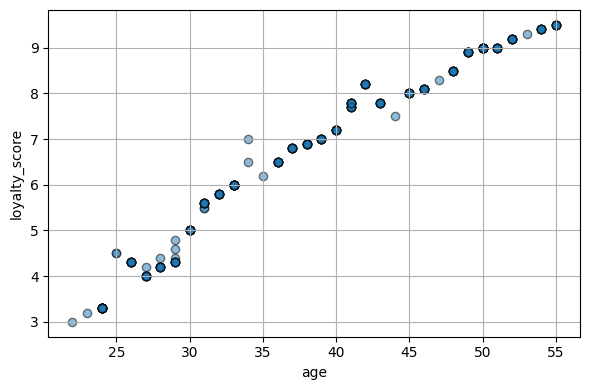

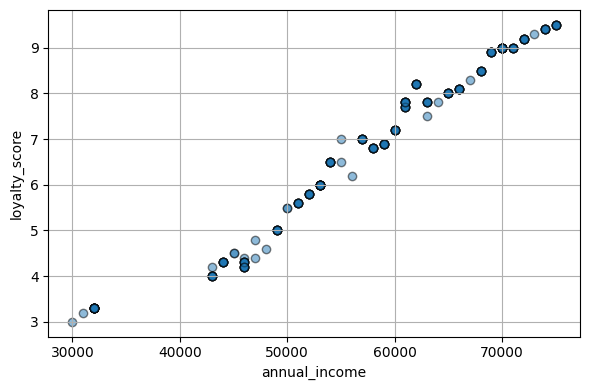

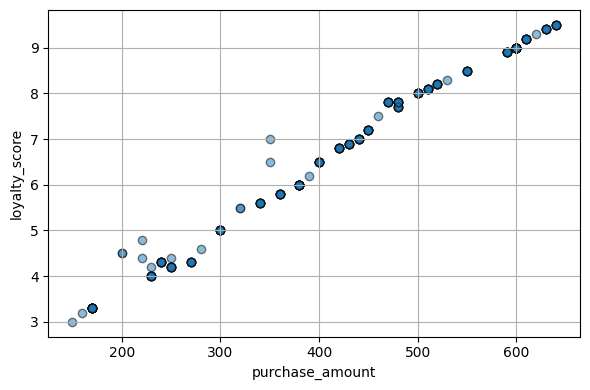

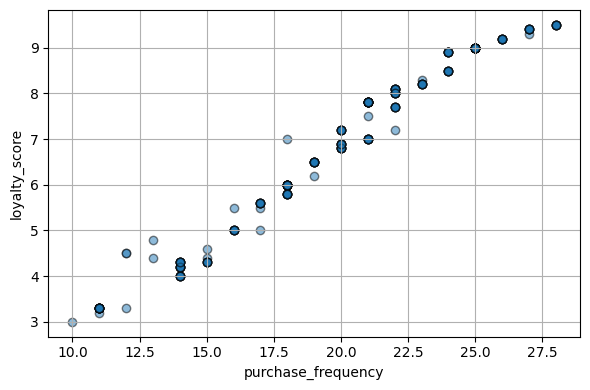

In [29]:
from matplotlib import pyplot as plt

num_of_features = X.col
num_of_samples = X.row

feature_names = df.drop(columns=['user_id','region','loyalty_score']).columns.tolist()

# Plotting
for i in range(num_of_features):
  Xi = [X.data[row][i] for row in range(num_of_samples)]
  Y = [y.data[row][0] for row in range(num_of_samples)]

  plt.figure(figsize=(6,4))
  plt.scatter(Xi, Y, alpha=0.5, edgecolors='k')
  plt.xlabel(f'{feature_names[i]}')
  plt.ylabel('loyalty_score')
  plt.grid(True)
  plt.tight_layout()
  plt.show()


### c. Xây dựng mô hình hồi quy tuyến tính

In [30]:
class LinearRegression:
  def __init__(self):
    '''
    Initialize a LinearRegression model.

    Attributes:
      weights (Matrix or None): The learned weight vector after training.
    '''
    self.weights = None

  def fit(self, X: Matrix, y: Matrix):
    '''
    Train the linear regression model using the normal equation:
      w = (X^T * X)^-1 * X^T * y (assume X^T * X is invertilbe)

    Args:
      X (Matrix): The input feature matrix (with shape n x d),
                  where n is the number of samples and d is the number of features.
      y (Matrix): The output target vector (with shape n x 1).

    Returns:
      None
    '''
    X = X.add_bias()
    XT = X.transpose()
    XTX = XT.mul(X)
    self.weights = XTX.inverse().mul(XT).mul(y)

  def predict(self, X: Matrix):
    '''
    Predict target values for the given input data using the learned weights.

    Args:
      X (Matrix): The input feature matrix for prediction (with shape n x d),
                  should have the same number of columns as used in training.

    Returns:
      Matrix: The predicted values (n x 1).

    Raises:
      ValueError: If 'fit()' has not been called yet.
    '''
    if self.weights is None:
      raise ValueError('Call fit() first!!!')
    X = X.add_bias()
    return X.mul(self.weights)

  def mse(self, X: Matrix, y: Matrix):
    '''
    Calculate the Mean Squared Error (MSE) between predictions and actual targets.

    Args:
      X (Matrix): The input feature matrix (n x d).
      y (Matrix): The actual target values (n x 1).

    Returns:
      float: The mean squared error value.
    Raises:
      ValueError: If 'fit()' has not been called yet.
    '''
    if self.weights is None:
      raise ValueError('Call fit() first!!!')
    n = X.row
    predictions = self.predict(X)
    error = [
        (predictions.data[row][0] - y.data[row][0])**2 for row in range(X.row)
    ]
    return sum(error)/n

  def __str__(self):
    '''
    Return a string representation of the model's learned weights.

    Returns:
      str: A message showing the weights or that the model hasn't been trained.
    '''
    if self.weights is None:
      return 'LinearRegression model has not been trained yet'
    return 'Weights:\n' + str(self.weights)

  def __repr__(self) -> str:
    return self.__str__()

In [31]:
model = LinearRegression()

model.fit(X, y)
print(model)
print(f'Mean Square Error: {model.mse(X, y)}')

Weights:
0.5554060
0.0050437
0.0000347
0.0123062
-0.0597778
Mean Square Error: 0.036973039452881815


### d. Mô hình hồi quy tuyến tính chỉ sử dụng một đặc trưng

Feature name: purchase_amount with MSE = 0.042
Model weights (w0 and w1):
Weights:
1.0565297
0.0134802


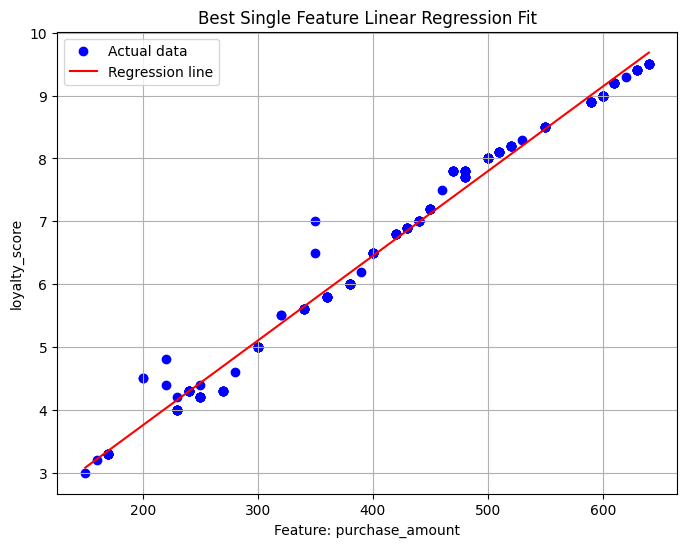

In [32]:
from matplotlib import pyplot as plt

num_of_samples = X.row
num_of_features = X.col

min_mse = float('inf')
best_feature_index = -1
best_model = None
best_Xi = None

# Find best single feature
for i in range(num_of_features):
  Xi = Matrix([[X.data[row][i]] for row in range(num_of_samples)])

  model = LinearRegression()
  model.fit(Xi, y)
  mse = model.mse(Xi, y)

  if mse < min_mse:
    min_mse = mse
    best_feature_index = i
    best_model = model
    best_Xi = Xi

print(f'Feature name: {feature_names[best_feature_index]} with MSE = {min_mse:.3f}')
print('Model weights (w0 and w1):')
print(best_model)

# Extract values for plotting
X_values = [row[0] for row in best_Xi.data]
y_values = [row[0] for row in y.data]

# Predict using the best model and feature
y_pred_matrix = best_model.predict(best_Xi)
y_preds = [row[0] for row in y_pred_matrix.data]

# Sort for a smooth line
sorted_pairs = sorted(zip(X_values, y_preds))
X_sorted, y_pred_sorted = zip(*sorted_pairs)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_values, y_values, color='b', label='Actual data')
plt.plot(X_sorted, y_pred_sorted, color='r', label='Regression line')
plt.xlabel(f'Feature: {feature_names[best_feature_index]}')
plt.ylabel('loyalty_score')
plt.title('Best Single Feature Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()


### e. Thiết kế mô hình hồi quy tuyến tính

In [34]:
def transform(X: Matrix) -> Matrix:
  '''
  Transform the input feature matrix by extracting and engineering features.

  Specifically, for each row, the function extracts:
  - pf (purchase_frequency)
  - pf^2 (square of purchase_frequency)
  - pa (purchase_amount)
  - age

  Args:
    X : A matrix where each row is a sample and columns represent features,
        where:
        - row[0] = age
        - row[2] = purchase_amount (pa)
        - row[3] = purchase_frequency (pf)

  Returns:
    Matrix: A new matrix with 4 features: [pf, pf^2, pa, age].
  '''
  new_data = []
  for row in X.data:
    age = row[0]
    pa = row[2]
    pf = row[3]
    new_row = []
    new_row = [age, pf, pf**2, pa]
    new_data.append(new_row)
  return Matrix(new_data)

X_transformed = transform(X)

model = LinearRegression()
model.fit(X_transformed, y)
print('MSE with transformed features:', model.mse(X_transformed, y))

MSE with transformed features: 0.03316747484768686
